In [76]:
import os
from datetime import datetime, timedelta

import biosppy as bp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from mne.io import read_raw_edf
from neo import MicromedIO

from ltbio.biosignals import modalities, Event
from ltbio.biosignals.sources.BitalinoShort import BitalinoShort


In [41]:
path_ = 'G:\\PreEpiSeizures\\Patients_HSM\\Patient102\\HSM\\FA7775NH.edf'

hsm_data = read_raw_edf(path_)
# get channels that correspond to type (POL Ecg = type ecg)
#channel_list = [hch for hch in hsm_data.ch_names if sensor.lower() in hch.lower()]
# initial datetime
# structure of hsm_sig is two arrays, the 1st has one array for each channel and the 2nd is an int-time array
#hsm_sig = hsm_data[channel_list]

Extracting EDF parameters from G:\PreEpiSeizures\Patients_HSM\Patient102\HSM\FA7775NH.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [42]:
start_idx = float((datetime(2019, 3, 14, 17, 48, 0) - hsm_data.info['meas_date'].replace(tzinfo=None)).total_seconds())
hsm_data.crop(start_idx, start_idx + 300)

In [46]:
len(hsm_data)

300001

In [49]:
eeg_idx = [ch for ch in hsm_data.ch_names if 'EEG' in ch]



In [78]:
time = pd.date_range(datetime(2019, 3, 14, 17, 48, 0), datetime(2019, 3, 14, 17, 48, 0) + timedelta(seconds=300), periods = len(hsm_data))

In [71]:
eeg_df = pd.DataFrame(hsm_data[eeg_idx][0], index=eeg_idx)

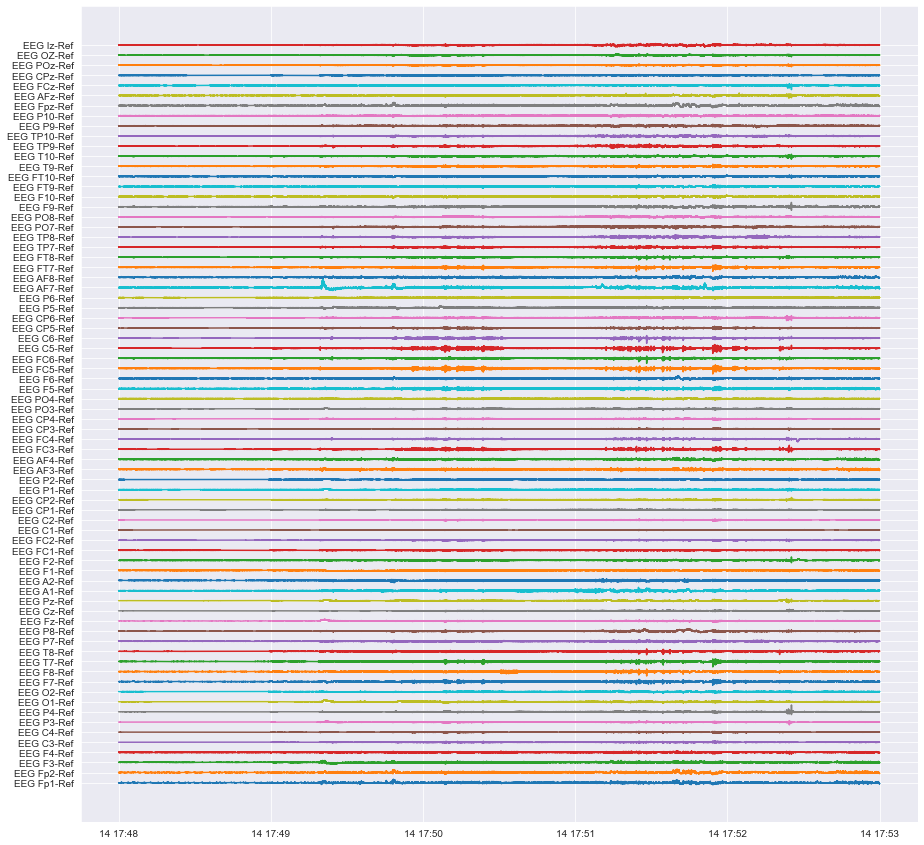

In [94]:
plt.figure(figsize=(15,15))

for i in range(len(eeg_df)):

    plt.plot(time, eeg_df.iloc[i] * 15 + np.ones(len(hsm_data)) * 0.05*i)
plt.yticks(np.arange(0, 0.05 * 74, 0.05), labels=eeg_idx)
plt.show()

In [95]:

path_ = 'G:\\PreEpiSeizures\\Patients_HEM\\Retrospective\\PAT_413\\hospital\\seizures'

dirfile = os.listdir(path_)[0]

        # get edf data
seg_micromed = MicromedIO(path_ + os.sep + dirfile)
hem_data = seg_micromed.read_segment()
hem_sig = hem_data.analogsignals[0]

In [96]:
ch_list = seg_micromed.header['signal_channels']['name']
find_idx = [hch for hch in range(len(ch_list)) if ch_list[hch].strip() not in ['ecg', 'ECG', 'MKR+']]

In [109]:
np.array(hem_sig[:, find_idx].T)

array([[ -73.24219   ,  -63.671875  ,  -54.003906  , ...,   16.601562  ,
          17.382812  ,   15.625     ],
       [-251.66016   , -268.45703   , -258.78906   , ...,   17.089844  ,
           7.7148438 ,   -2.2460938 ],
       [  11.1328125 ,    8.59375   ,   14.6484375 , ...,   22.558594  ,
          25.195312  ,   20.898438  ],
       ...,
       [  17.578125  ,   18.554688  ,   17.382812  , ...,    4.296875  ,
           0.48828125,   -1.5625    ],
       [  34.179688  ,   32.617188  ,   33.789062  , ...,   15.917969  ,
          18.75      ,   18.945312  ],
       [  37.98828   ,   40.820312  ,   40.722656  , ...,   23.925781  ,
          15.4296875 ,    7.7148438 ]], dtype=float32)

In [144]:
hem_data.children

(AnalogSignal with 36 channels of length 120043; units uV; datatype float32 
 name: 'Signals'
 annotations: {'stream_id': '0'}
 sampling rate: 256.0 Hz
 time: 0.0 s to 468.91796875 s,
 Epoch name: 'Event A' annotations: {'id': ''},
 Epoch name: 'Event B' annotations: {'id': ''},
 Event name: 'Trigger' annotations: {'id': ''},
 Event name: 'Note' annotations: {'id': ''})

In [126]:
eeg_df = pd.DataFrame(np.array(hem_sig[:, find_idx].T), index=np.array(ch_list)[find_idx])
time = pd.date_range(pd.to_datetime(hem_data.t_start), pd.to_datetime(hem_data.t_start) + timedelta(seconds=float(hem_data.t_stop)), periods=len(hem_sig))

In [137]:
from matplotlib.dates import DateFormatter

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


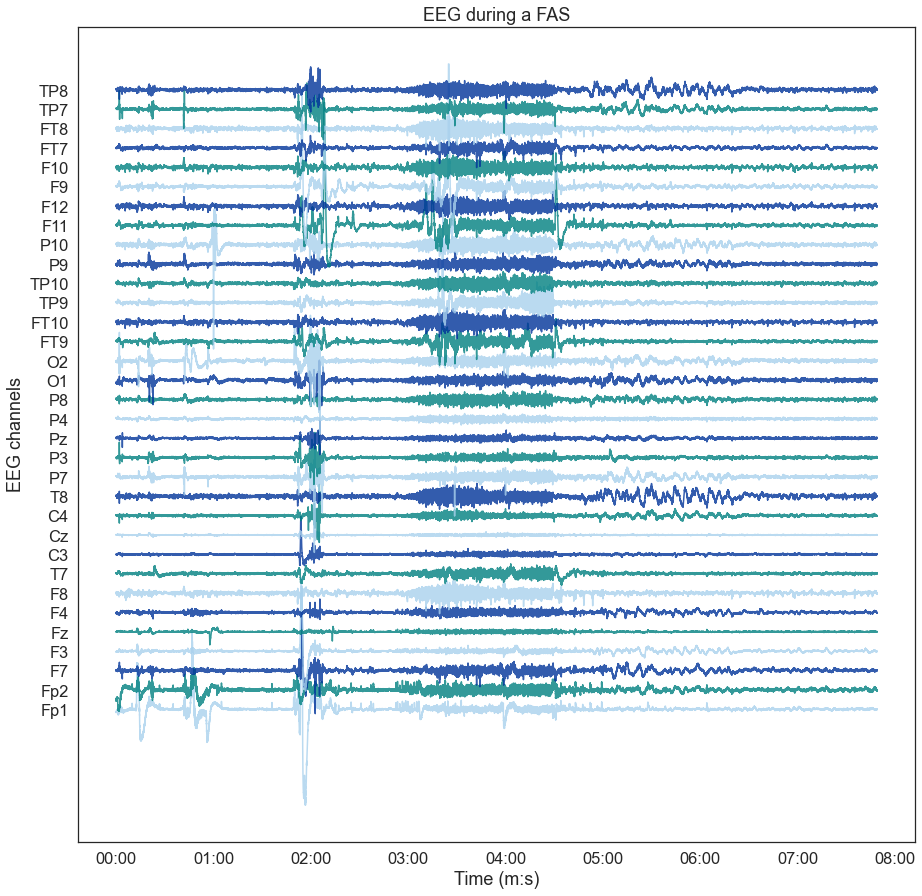

In [160]:
sb.set(font_scale=1.5)
sb.set_style(style='white')
# sb.color_palette('light:#5A9', as_cmap=True)
colors = {'lightblue': '#A9D1ED', 'lightorange': '#F8CBAD',  'darkblue': '#003399', 'onset': '#843C0C', 'teal':'teal', }
# sb.set_palette(sb.color_palette('light:#5A9', as_cmap=True), 6)

fig, ax = plt.subplots(figsize=(15,15))

for i in range(len(eeg_df)):

    color_i = colors['lightblue'] if i in [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33]  else colors['teal'] if i in [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31] else colors['darkblue'] if i in [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32] else colors['lightorange']

    plt.plot(time, eeg_df.iloc[i] + np.ones(len(hem_sig)) * (i * 500), color=color_i, alpha=0.8)
plt.title('EEG during a FAS')
plt.ylabel('EEG channels')
plt.xlabel('Time (m:s)')
plt.yticks(np.arange(0, 500 * (i + 1), 500), labels=eeg_df.index)
ax.xaxis.set_major_formatter(DateFormatter('%M:%S'))
figname = 'C:\\Users\\Mariana\\Documents\\CAT\\images\\eeg_during_seizure'
plt.savefig(figname + '.png', dpi=600)
plt.savefig(figname + '.eps', format='eps')
plt.show()